<a href="https://colab.research.google.com/github/scode-cs/linear-regression/blob/master/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/practice/supervised/regression/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [31]:
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, 4]

**One Hot Encoding**
-- Dummy variable trap

In [32]:
np.unique(X_data['State'])

array(['California', 'Florida', 'New York'], dtype=object)

In [33]:
states = pd.get_dummies(X_data['State'], drop_first=True)

Now State will be removed from Independent Dataset

In [34]:
X_data = X_data.drop('State', axis=1)

In [35]:
X_data = pd.concat([X_data, states], axis=1)

**Train and Test Data Split**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

**Liner Regression**

In [42]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predict = lr_model.predict(X_test)

**Model Score**

In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
score

0.9347068473282423

**Plot Actual Vs Predicted Data**

In [88]:
index_df = pd.DataFrame([1,2,3,4,5,6,7,8,9,10], columns=['Index'])

In [96]:
y_test_df = pd.DataFrame(y_test.to_numpy(), columns=['TestData'])
y_predict_df = pd.DataFrame(y_predict, columns=['PredictedData'])

In [108]:
frames = [index_df, y_test_df, y_predict_df]
plot_df = pd.concat(frames, axis=1)

In [114]:
plot_df

,Index,TestData,PredictedData
0,1,103282.38,103015.201598
1,2,144259.40,132582.277608
2,3,146121.95,132447.738452
3,4,77798.83,71976.098513
4,5,191050.39,178537.482211
5,6,105008.31,116161.242302
6,7,81229.06,67851.692097
7,8,97483.56,98791.733747
8,9,110352.25,113969.435330
9,10,166187.94,167921.065696


In [110]:
import seaborn as sns

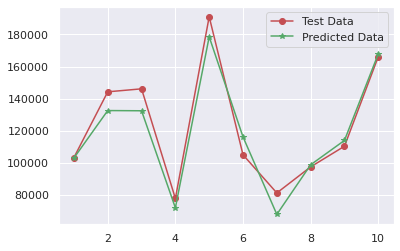

In [151]:
# Test data Vs predicted data
plt.plot(plot_df.Index, plot_df.TestData, marker='o', color='r', label= 'Test Data')
plt.plot(plot_df.Index, plot_df.PredictedData, marker = '*', color = 'g', label = 'Predicted Data')
plt.legend();